# Aprendizaje no supervisado

estos algoritmos tratan de descubrir autónomamente estructuras ocultas en los datos con el fin de agruparlas, encontrar relaciones interesantes (a.k.a. aprendizaje de reglas de asociación), o reducir la dimensionalidad inherente (describir efectos con menos características). algunos miembros de esta área de grupo K-Means agrupamiento, análisis de componentes principales, aprendizaje múltiple, algoritmo apriori, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" alt="Fashion-MNIST sample" width="700"/>

## Reduccion de dimensionalidad

### PCA y t-SNE

Utilizar pandas para leer los datos desde el archivo `fashion-mnist_test.csv`

In [2]:
data = pd.read_csv('fashion-mnist_test.csv', header=0)

Definir un diccionario que mapee las etiquetas numéricas a los tipos de prenda de vestir que representan

In [3]:
classes = {
    0: 'camiseta',
    1: 'pantalón',
    2: 'suéter',
    3: 'vestido',
    4: 'chaqueta',
    5: 'sandalia',
    6: 'camisa',
    7: 'zapatilla',
    8: 'bolso', 
    9: 'bota'}

Visaluzar los datos tabularmente

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Probar diferentes valores de `image_index` para visualizar algunas imágenes del set de datos

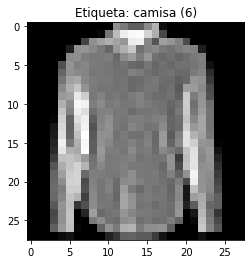

In [5]:
image_index = 13

fig1, ax1 = plt.subplots()
ax1.imshow(data.iloc[image_index, 1:].to_numpy().reshape(28, 28), cmap='gray')
label = data.iloc[image_index, 0]
ax1.set_title('Etiqueta: {0} ({1})'.format(classes[label], label));

Aplicar PCA al set de datos para reducir su dimensionalidad hasta 2 (se debe excluir la etiqueta)

In [6]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data.iloc[:, 1:])

Graficar el resultado de reducir la dimensionalidad utilizando PCA:

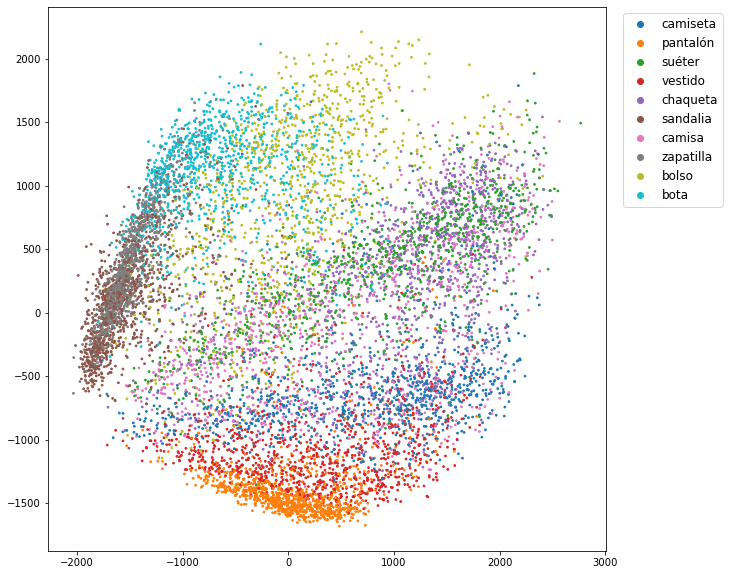

In [7]:
fig2, ax2 = plt.subplots()
scatter2 = ax2.scatter(pca_features[:, 0], pca_features[:, 1], s=3, c=data.iloc[:, 0], cmap='tab10')
ax2.legend(scatter2.legend_elements()[0], [classes[i] for i in range(10)], bbox_to_anchor=(1.22, 1), fontsize='large')
fig2.set_size_inches(10, 10)

Definir un "pipeline" de scikit-learn que aplique PCA al set de datos original para reducir su
dimensionalidad a 60 y que luego aplique t-SNE para reducir aún más la dimensionalidad hasta 2.
Utilizar una perplejidad de 30 para t-SNE

In [15]:
dim_reduc = make_pipeline(PCA(n_components=60), 
                          TSNE(n_components=2, perplexity=30))

Aplicar la "pipeline" y obtenga los datos bidimensionales resultantes (se debe excluir la etiqueta).
Esto puede tardar unos minutos

In [16]:
new_features = dim_reduc.fit_transform(data.iloc[:, 1:])

Graficar el resultado de aplicar la "pipeline" que incluye t-SNE:

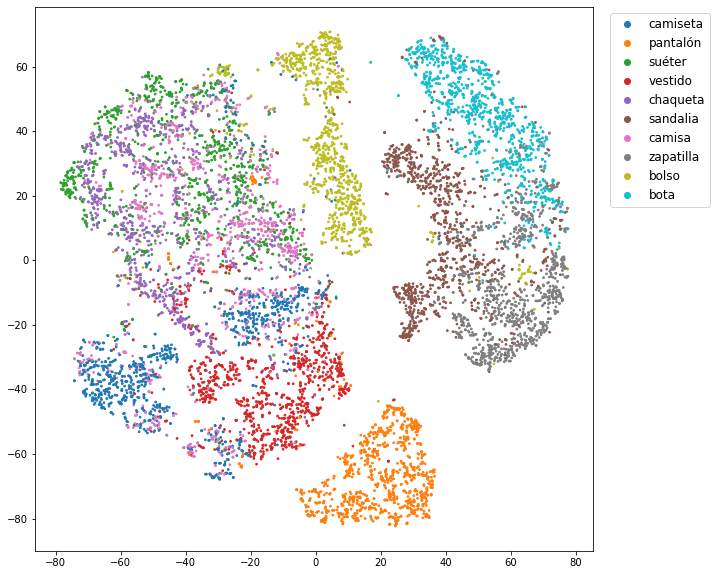

In [17]:
fig3, ax3 = plt.subplots()
scatter3 = ax3.scatter(new_features[:, 0], new_features[:, 1], s=3, c=data.iloc[:, 0], cmap='tab10')
ax3.legend(scatter3.legend_elements()[0], [classes[i] for i in range(10)], bbox_to_anchor=(1.22, 1), fontsize='large')
fig3.set_size_inches(10, 10)

## Clustering

### DBSCAN

Aplicar DBSCAN a las características bidimensionales encontradas escogiendo valores apropiados
de `eps` y `min_samples` para obtener 4 clusters:

In [11]:
dbscan = DBSCAN(eps=5, min_samples=30)
clusters = dbscan.fit_predict(new_features)

Graficar la clusterización obtenida con DBSCAN:

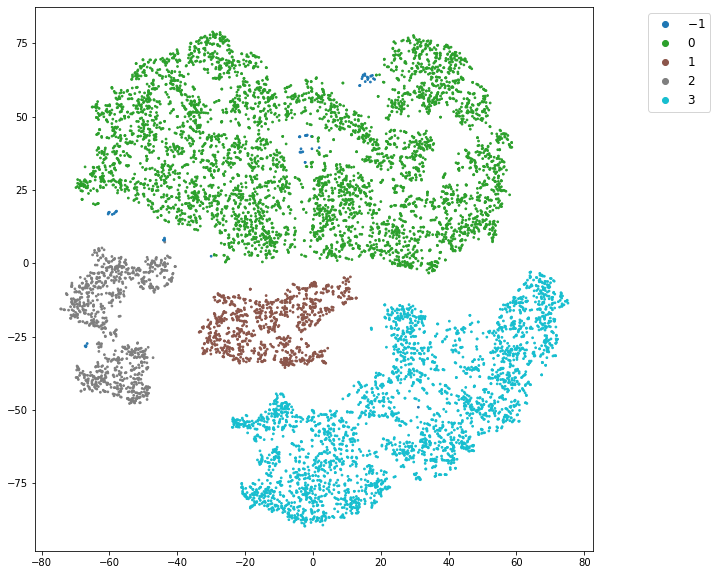

In [12]:
fig4, ax4 = plt.subplots()
scatter4 = ax4.scatter(new_features[:, 0], new_features[:, 1], s=3, c=clusters, cmap='tab10')
ax4.legend(*scatter4.legend_elements(), bbox_to_anchor=(1.22, 1), fontsize='large')
fig4.set_size_inches(10, 10)

### K-Means

Aplicar el algoritmo de agrupamiento KMeans, ingresando 4 como parametro de numero de clusters

In [13]:
kmeans = KMeans(n_clusters=4)
clusters_kmeans = kmeans.fit_predict(new_features)

Graficar la clusterización obtenida con KMeans:

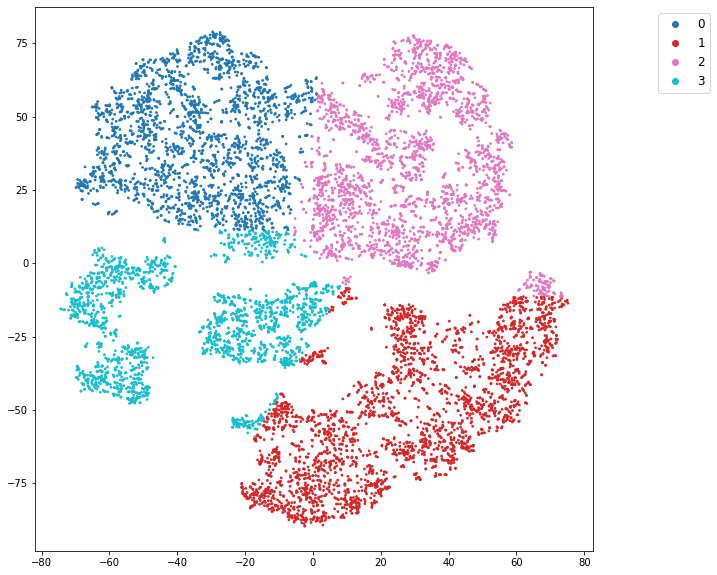

In [14]:
fig4, ax4 = plt.subplots()
scatter4 = ax4.scatter(new_features[:, 0], new_features[:, 1], s=3, c=clusters_kmeans, cmap='tab10')
ax4.legend(*scatter4.legend_elements(), bbox_to_anchor=(1.22, 1), fontsize='large')
fig4.set_size_inches(10, 10)